In [348]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import math
from scipy import stats

In [349]:
sample = np.array([round(np.random.exponential(1), 3) for i in range(25)])
print(sample)

[0.223 1.531 0.248 0.1   0.037 0.578 0.741 0.976 0.188 1.033 1.908 0.73
 0.413 2.28  1.911 2.784 1.213 0.028 2.928 0.211 2.984 0.684 0.311 0.191
 0.068]


In [350]:
#Функции для пункта а)
def moda(x : list[float]) -> float:
    maxcount = 1
    xdict = {}
    retarr = []
    for val in x:
        if val in xdict:
            xdict[val] += 1
        else:
            xdict[val] = 1
        maxcount = max(maxcount, xdict[val])
    if maxcount == 1:
        return "все элементы встречаются в единичном экземпляре"
    else:
        for val in xdict:
            if xdict[val] == maxcount:
                retarr.append(val)
        return " ".join(str(val) for val in retarr)               

def mediana(x : list[float]) -> float:
    return np.median(x)
    
def razmah(x : list[float]) -> float:
    return max(x) - min(x)

def assymetric_coeff(x : list[float]) -> float:
    m1 = np.mean(x)
    mu2 = np.mean((x - m1) ** 2)
    mu3 = np.mean((x - m1) ** 3)
    return mu3 / (mu2 ** 1.5)

In [351]:
#пункт а)
print(f"Mода выборки: {moda(sample)}")
print(f"Mедиана выборки: {mediana(sample)}")
print(f"Pазмах выборки: {razmah(sample)}")
print(f"Kоэффициент ассиметрии: {assymetric_coeff(sample)}")

Mода выборки: все элементы встречаются в единичном экземпляре
Mедиана выборки: 0.684
Pазмах выборки: 2.956
Kоэффициент ассиметрии: 0.9390973847594233


In [352]:
#Функции для пункта b)
def emp_dist_func(x : list[float]) -> None:
    x = np.append(0, x)
    x = np.sort(x)
    y = np.arange(0, 1.01, step = 0.04)
    plt.figure(figsize = (16, 8))
    plt.xticks(np.arange(x.max() * 1.05, step = 0.1))
    plt.yticks(np.arange(1.1, step = 0.05))
    plt.xlim(x.min(), x.max() * 1.05)
    plt.grid()
    plt.title("Эмпирическая функция распределения", fontsize = 20)
    plt.xlabel("x", fontsize = 20, loc = "right")
    plt.ylabel("F(x)", fontsize = 20, loc = "top", rotation=0)
    for i in range(1, len(y)):
        plt.plot([x[i - 1], x[i]], [y[i - 1], y[i - 1]], color = "royalblue", linewidth = 2)
        plt.scatter(x[i], y[i], s = 50, facecolor = "none", edgecolor = "royalblue")
    plt.plot([x.max(), x.max() * 1.05], [1, 1], color = "royalblue", linewidth = 2)
    plt.show()
    
def hystogramma(x : list[float]) -> None:
    n = int(1 + np.log2(len(x)))  
    plt.figure(figsize = (16, 8))
    plt.xticks(np.arange(x.max() * 1.05, step = 0.1))
    plt.yticks(np.arange(1.1, step = 0.05))
    plt.grid()
    plt.hist(x, bins=n, density=True, color = "royalblue")
    plt.title('Гистограмма ', fontsize=20)
    plt.show()
    
def boxplot(x : list[float]) -> None:
    plt.figure(figsize = (16, 8))
    plt.grid()
    sns.boxplot(x = x, color = "royalblue")
    plt.title('boxplot ', fontsize=20)
    plt.show()

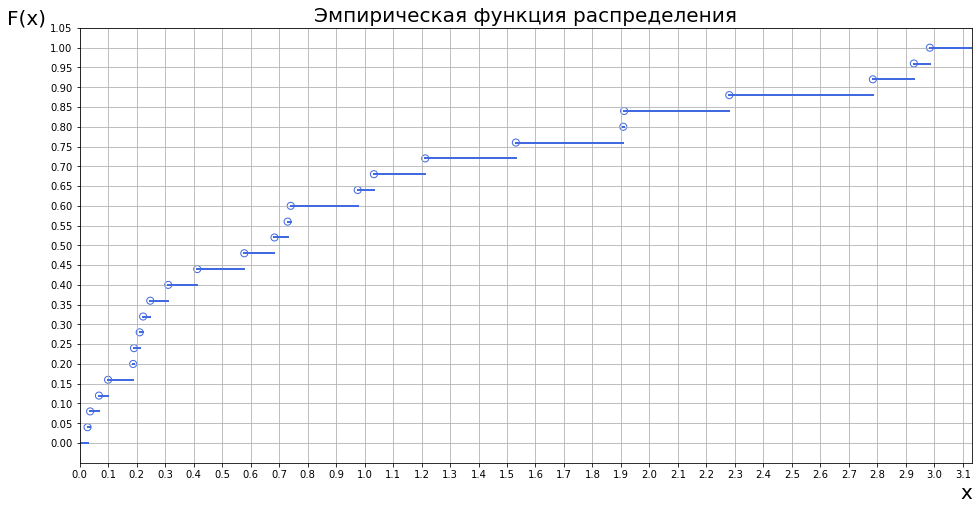

In [353]:
#пункт b) эмпирическая функция распределения
emp_dist_func(sample)

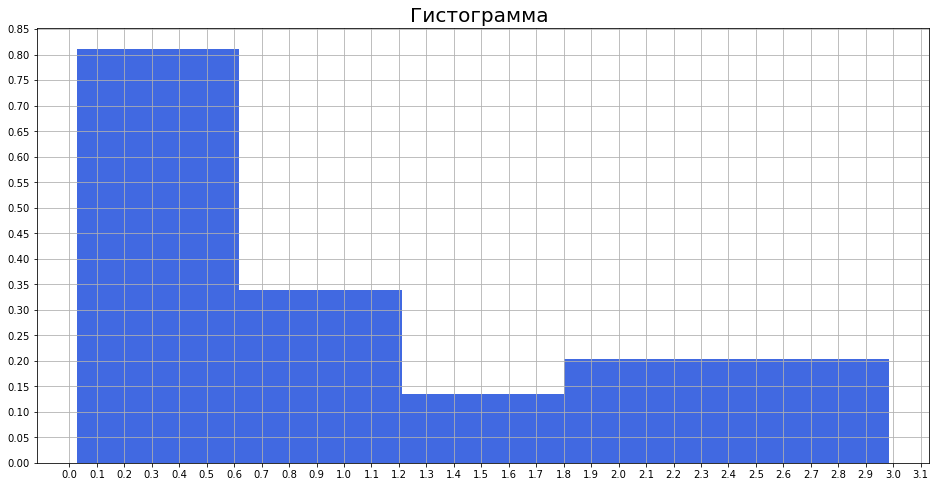

In [354]:
#пункт b) гистограмма
hystogramma(sample)

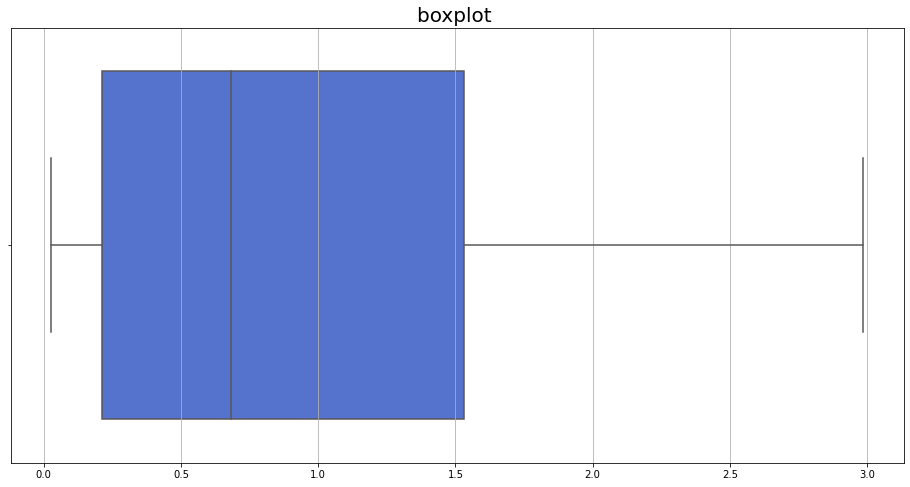

In [355]:
#пункт b) boxplot
boxplot(sample)

In [356]:
#Функции для пункта c(он же d)
def mean_distribution(x : list[float]) -> None:
    mu = np.mean(x)
    sigma =  ((np.mean((x - mu) ** 2)) / 25) ** 0.5
    print(f"По ЦПТ Ляпунова <x> ~ N({mu, sigma ** 2})")
    
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = 1/((2 * np.pi) ** 0.5 * sigma) * np.e ** (-(x - mu) ** 2 / (2 * sigma ** 2) )
    
    plt.figure(figsize = (16, 8))
    plt.plot(x, y)
    plt.grid()
    plt.title("Плостность распределения среднего арифметического выборки", fontsize = 20)
    plt.show()
    
def mean_bootstrap(x : list[float]) -> None:
    bootstrap_array = np.array([])
    for i in range(1000):
        ith_subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(np.mean(ith_subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True, color = "royalblue")
    plt.title('Гистограмма среднего арифметического по bootstrap', fontsize=20)
    plt.show()
    
def compare_mean_boot_cpt(x : list[float]) -> None:
    
    bootstrap_array = np.array([])
    for i in range(1000):
        ith_subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(np.mean(ith_subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    mu = np.mean(x)
    sigma =  ((np.mean((x - mu) ** 2)) / 25) ** 0.5   
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = 1/((2 * np.pi) ** 0.5 * sigma) * np.e ** (-(x - mu) ** 2 / (2 * sigma ** 2) )
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True, color = "royalblue")
    plt.plot(x, y, color = "red")
    plt.title("Плотность распределения и бутстраповская оценка среднего арифметического", fontsize=20)
    plt.show()

По ЦПТ Ляпунова <x> ~ N((0.9719600000000002, 0.035730859136))


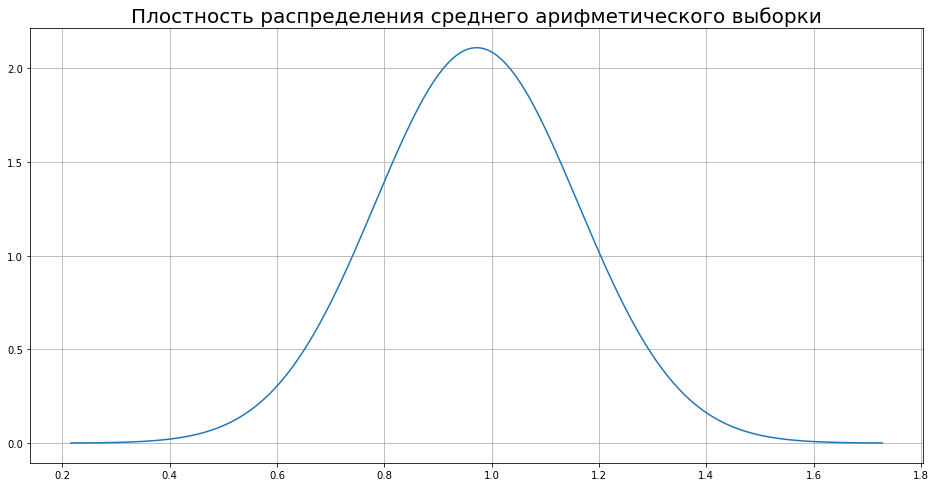

In [357]:
#Пункт с) плотность распределения среднего арифметического
mean_distribution(sample)

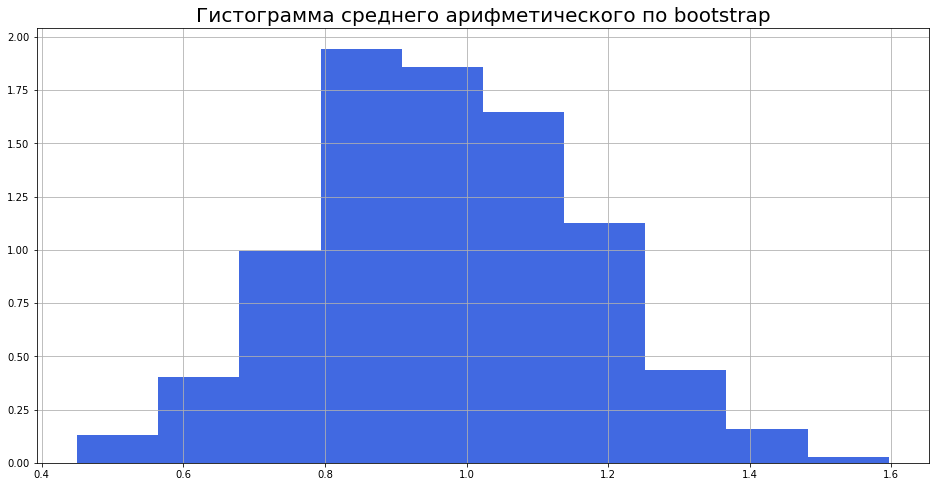

In [358]:
#Пункт с) бутстраповская оценка плотности
mean_bootstrap(sample)

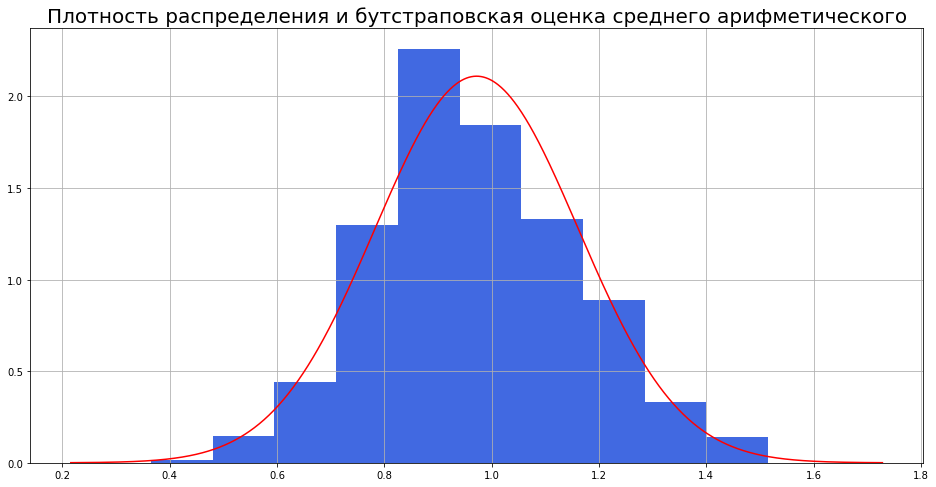

In [359]:
#Пункт с) сравнение плотности распределения с бутстраповской оценкой
compare_mean_boot_cpt(sample)

In [360]:
#Функция для пункта е)
def assymetric_coeff_bootstrap(x : list[float]) -> None:
    bootstrap_array = np.array([])
    for i in range(1000):
        ith_subsample = np.array([rd.choice(x) for i in range (25)])
        ith_assym_coeff = assymetric_coeff(ith_subsample)
        bootstrap_array = np.append(ith_assym_coeff, bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True, color = "royalblue")
    plt.title("Гистограмма коэффициента отклонения по bootstrap", fontsize=20)
    plt.show()

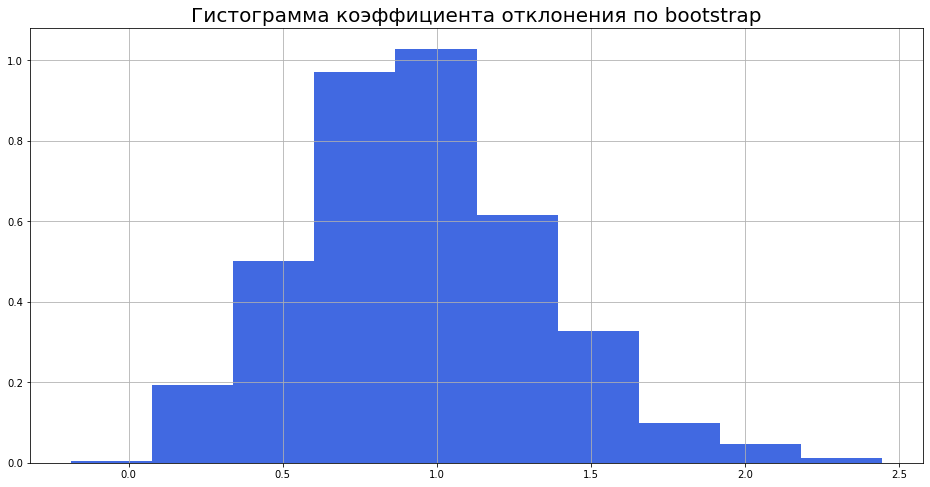

In [361]:
#Пункт е)
assymetric_coeff_bootstrap(sample)

In [362]:
#Функции для пункта f)
def median_distribution(x : list[float]) -> None:
    combin = math.comb(24, 12)
    x = np.linspace(0, 5, 500)
    y = 25 * (np.e ** -x ) * combin * (1 - np.e ** -x) ** 12 * (np.e ** -x) ** 12
    
    plt.figure(figsize = (16, 8))
    plt.plot(x, y)
    plt.grid()
    plt.title("Плостность распределения медианы выборки", fontsize = 20)
    plt.show()
    
def median_bootstrap(x : list[float]) -> None:
    bootstrap_array = np.array([])
    for i in range(1000):
        ith_subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(mediana(ith_subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True, color = "royalblue")
    plt.title("Гистограмма медианы по bootstrap", fontsize=20)
    
def compare_median_boot_cpt(x : list[float]) -> None:    
    bootstrap_array = np.array([])
    for i in range(1000):
        ith_subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(mediana(ith_subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    combin = math.comb(24, 12)
    x = np.linspace(0, 5, 500)
    y = 25 * (np.e ** -x ) * combin * (1 - np.e ** -x) ** 12 * (np.e ** -x) ** 12
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True, color = "royalblue")
    plt.plot(x, y, color = "red")
    plt.title("Плотность распределения и бутстраповская оценка медианы", fontsize=20)
    plt.show()

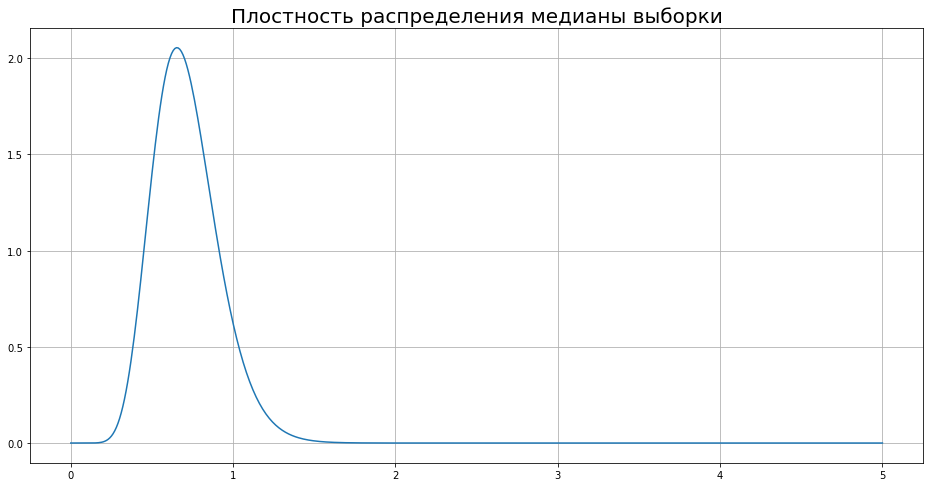

In [363]:
#Пункт f) плотность распределения медианы
median_distribution(sample)

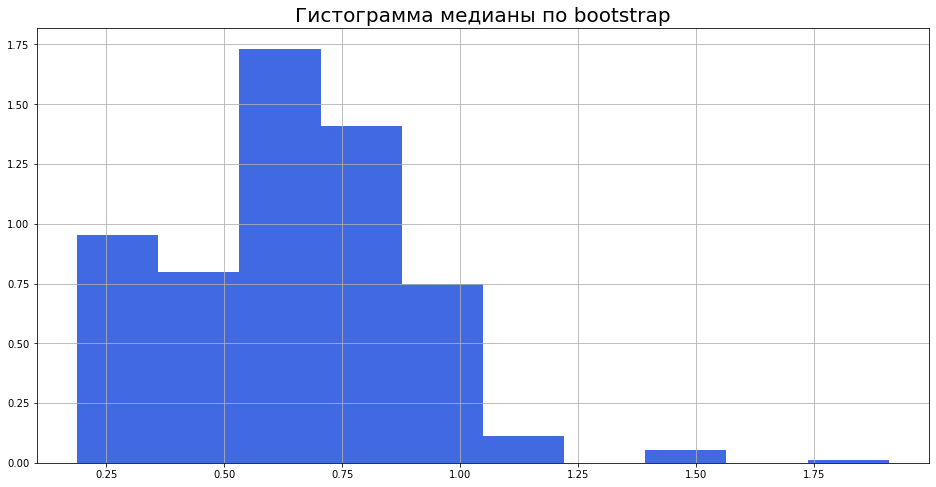

In [364]:
#Пункт f) бутстраповская оценка медианы
median_bootstrap(sample)

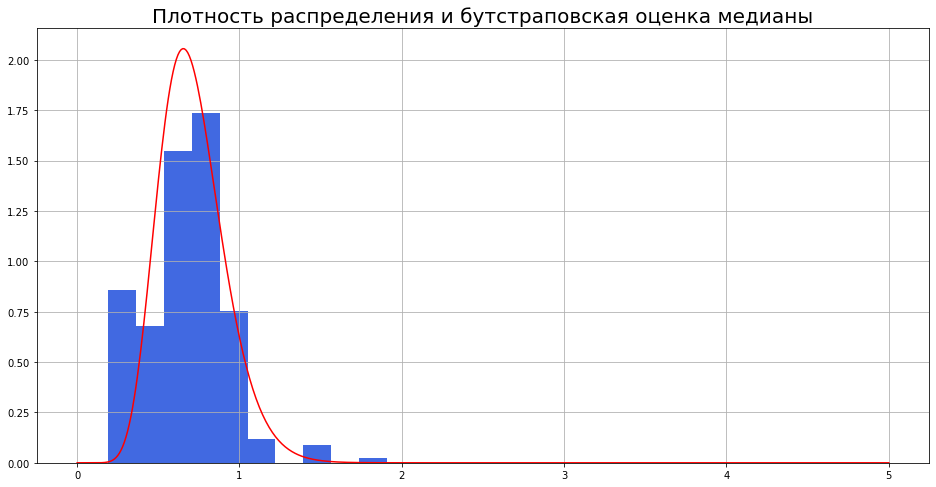

In [365]:
#Пункт f) сравнение бутстраповской оценки и плотности распределения
compare_median_boot_cpt(sample)